<a href="https://colab.research.google.com/github/prudvinathmalepati/machine-learning/blob/main/module2/assignments/Assignment_1_01_cleaning_and_nlp_And_02_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparations

In [1]:
import pandas as pd

###Reading the data from tsv source

In [2]:
#Connecting to Google Drive and importing the dataset.
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

df_path = 'gdrive/My Drive/rspct.tsv'  #change dir to your project folder
dataset = pd.read_csv(df_path, sep='\t')

Mounted at /content/gdrive


In [3]:
#check if the data is imported correct
dataset

,id,subreddit,title,selftext
0,6d8knd,talesfromtechsupport,Remember your command line switches...,"Hi there, <lb>The usual. Long time lerker, fi..."
1,58mbft,teenmom,"So what was Matt ""addicted"" to?",Did he ever say what his addiction was or is h...
2,8f73s7,Harley,No Club Colors,Funny story. I went to college in Las Vegas. T...
3,6ti6re,ringdoorbell,"Not door bell, but floodlight mount height.",I know this is a sub for the 'Ring Doorbell' b...
4,77sxto,intel,Worried about my 8700k small fft/data stress r...,"Prime95 (regardless of version) and OCCT both,..."
...,...,...,...,...
1012995,5r9k4h,MSLGame,Is this months rebirth and dungeon astro's wor...,I looking on what to evo3 farm next and was ex...
1012996,6529fp,CrohnsDisease,I might need a Medical leave from grad school,Has anyone here ever needed a medical leave fr...
1012997,7tiyzx,HongKong,Police harassing ethnic minorities in Hong Kong,I thought I'd make this post so that more peop...
1012998,664ha3,yorku,SU EECS 2030 and EECS 2021 - need advice,"Hi, I just finished 1st year EECS courses and ..."


In [4]:
dataset.shape

(1013000, 4)

In [6]:
#Since the dataset is very large, we wil use only 50K rows for the purpose of this tutorial
dataset = dataset[:50000]
dataset.head()

,id,subreddit,title,selftext
0,6d8knd,talesfromtechsupport,Remember your command line switches...,"Hi there, <lb>The usual. Long time lerker, fi..."
1,58mbft,teenmom,"So what was Matt ""addicted"" to?",Did he ever say what his addiction was or is h...
2,8f73s7,Harley,No Club Colors,Funny story. I went to college in Las Vegas. T...
3,6ti6re,ringdoorbell,"Not door bell, but floodlight mount height.",I know this is a sub for the 'Ring Doorbell' b...
4,77sxto,intel,Worried about my 8700k small fft/data stress r...,"Prime95 (regardless of version) and OCCT both,..."


In [7]:
#Just confirming if we're using only 50k rows.
dataset.shape

(50000, 4)

###Connecting to the database
> Our standard solution is to persist the data in an SQLite database as soon as possible. Like JSON or CSV, the data still lives in a file and can be exchanged (and versioned) easily. Another advantage is that SQLite does not need a server while offering all standard selection mechanism including window functions. As we will enhance the data and save intermediate results, SQL tables come in very handy.  

> [A turtoial that explains necessity of this Workflow](https://medium.com/@datanizing/modern-text-mining-with-python-part-1-of-5-introduction-cleaning-and-linguistics-647f9ec85b6a)

In [9]:
import sqlite3
con = sqlite3.connect('selfposts.db')

###Save subreddit category info

In [11]:
pd.read_csv('gdrive/My Drive/subreddit_info.csv').to_sql('categories', con)

3394

#Cleaning Process

###Cleaning function
> When we peeked into the data present in out dataset, we noticed that some of our records contains some encoding <lb> (for new lines) etc. So we need to create a function that cleans such encodings in the dataset.

In [12]:
import re
def clean(s):
    s = s.replace(r'<lb>', "\n")
    s = s.replace(r'<tab>', "\i")
    s = re.sub(r'<br */*>', "\n", s)
    s = s.replace("&lt;", "<").replace("&gt;", ">").replace("&amp;", "&")
    s = s.replace("&amp;", "&")
    # markdown urls
    s = re.sub(r'\(https*://[^\)]*\)', "", s)
    # normal urls
    s = re.sub(r'https*://[^\s]*', "", s)
    s = re.sub(r'_+', ' ', s) #Underscores confuse the tokenizer and will be replaced by spaces
    s = re.sub(r'"+', '"', s)
    return str(s)

###Create new column in dataframe


In [13]:
dataset['selftext_clean'] = ''

###Iterate through the dataset and clean the data

In [14]:
for i, row in dataset.iterrows():
  dataset.at[i, 'selftext_clean'] = clean(row.selftext)

In [15]:
#After the cleaning is completed, we can check if the data is cleaned as expected
dataset.head()

,id,subreddit,title,selftext,selftext_clean
0,6d8knd,talesfromtechsupport,Remember your command line switches...,"Hi there, <lb>The usual. Long time lerker, fi...","Hi there, \nThe usual. Long time lerker, firs..."
1,58mbft,teenmom,"So what was Matt ""addicted"" to?",Did he ever say what his addiction was or is h...,Did he ever say what his addiction was or is h...
2,8f73s7,Harley,No Club Colors,Funny story. I went to college in Las Vegas. T...,Funny story. I went to college in Las Vegas. T...
3,6ti6re,ringdoorbell,"Not door bell, but floodlight mount height.",I know this is a sub for the 'Ring Doorbell' b...,I know this is a sub for the 'Ring Doorbell' b...
4,77sxto,intel,Worried about my 8700k small fft/data stress r...,"Prime95 (regardless of version) and OCCT both,...","Prime95 (regardless of version) and OCCT both,..."


> This looks OK, so we save the resulting DataFrame in the database table posts. This is the second table in the database and a good reference for future work.

In [16]:
dataset.to_sql('posts', con)

50000

# NLP
### Load spaCy

In [18]:
import spacy
nlp = spacy.load('en_core_web_sm')

### Iterate over all rows and perform NLP
> spaCy offers a variety of functionality. We are mainly interested in part-of-speech (POS) tagging and finding different kinds of words. Specifically, we want to focus on nouns, verbs, and adjectives and save them to different columns in the data frame. As spaCy has some size limitations, we only perform that for selfposts which are not too large. The code below is straightforward:

In [19]:
for i, row in dataset.iterrows():
    if i % 1000 == 0:
        print(i) # This is just to look at how many rows are processed (Useful when working with the complete dataset).
    if(row["selftext_clean"] and len(str(row["selftext_clean"])) < 1000000):
        doc = nlp(str(row["selftext_clean"]))
        adjectives = []
        nouns = []
        verbs = []
        lemmas = []

        for token in doc:
            lemmas.append(token.lemma_)
            if token.pos_ == "ADJ":
                adjectives.append(token.lemma_)
            if token.pos_ == "NOUN" or token.pos_ == "PROPN":
                nouns.append(token.lemma_)
            if token.pos_ == "VERB":
                verbs.append(token.lemma_)
                
        dataset.at[i, "selftext_lemma"] = " ".join(lemmas)                
        dataset.at[i, "selftext_nouns"] = " ".join(nouns)
        dataset.at[i, "selftext_adjectives"] = " ".join(adjectives)
        dataset.at[i, "selftext_verbs"] = " ".join(verbs)
        dataset.at[i, "selftext_nav"] = " ".join(nouns+adjectives+verbs)
        dataset.at[i, "no_tokens"] = len(lemmas)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000


###check results

In [22]:
dataset.head()

,id,subreddit,title,selftext,selftext_clean,selftext_lemma,selftext_nouns,selftext_adjectives,selftext_verbs,selftext_nav,no_tokens
0,6d8knd,talesfromtechsupport,Remember your command line switches...,"Hi there, <lb>The usual. Long time lerker, fi...","Hi there, \nThe usual. Long time lerker, firs...","hi there , \n the usual . long time lerker , ...",time lerker time poster place Alright story de...,usual long first sorry right independent own b...,produce go call work help produce use try remo...,time lerker time poster place Alright story de...,240.0
1,58mbft,teenmom,"So what was Matt ""addicted"" to?",Did he ever say what his addiction was or is h...,Did he ever say what his addiction was or is h...,do he ever say what his addiction be or be he ...,addiction beer addict addict group NA AA drink...,sober similar addicted,say chug talk edit add know drink go consider ...,addiction beer addict addict group NA AA drink...,88.0
2,8f73s7,Harley,No Club Colors,Funny story. I went to college in Las Vegas. T...,Funny story. I went to college in Las Vegas. T...,funny story . I go to college in Las Vegas . t...,story college Las Vegas college buddy strip da...,funny worth front bright red yellow green naiv...,go know motorcycle go end call note work outdr...,story college Las Vegas college buddy strip da...,170.0
3,6ti6re,ringdoorbell,"Not door bell, but floodlight mount height.",I know this is a sub for the 'Ring Doorbell' b...,I know this is a sub for the 'Ring Doorbell' b...,I know this be a sub for the ' Ring Doorbell '...,sub Ring Doorbell Floodlight wire bracket floo...,high ideal high,know have use have exist mount say have mount,sub Ring Doorbell Floodlight wire bracket floo...,97.0
4,77sxto,intel,Worried about my 8700k small fft/data stress r...,"Prime95 (regardless of version) and OCCT both,...","Prime95 (regardless of version) and OCCT both,...",Prime95 ( regardless of version ) and OCCT bot...,Prime95 version OCCT test part blend temp stoc...,small pure funny other lucky real heavy low no...,include make shoot find pass spike believe con...,Prime95 version OCCT test part blend temp stoc...,114.0


### Save to database

In [21]:
#Creating a new table 'posts_nlp'
dataset.to_sql('posts_nlp', con)

50000

#Data exploration with Pandas

###Library imports & settings

> **Note:** *This is part-2 of the assignment*

In [23]:
# filter warnings on depreciation etc.
import warnings
warnings.filterwarnings("ignore")

In [24]:
# import pandas, numpy
import pandas as pd
import numpy as np

# adjust pandas display
pd.options.display.max_columns = 30
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.precision = 2
pd.options.display.max_colwidth = -1

In [25]:
# Import matplotlib and seaborn and adjust some defaults
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 100

import seaborn as sns
sns.set_style("whitegrid")

###Load Data into Pandas

In [26]:
import sqlite3

sql = """
SELECT p.*, 
       c.category_1 as category, c.category_2 as subcategory
FROM posts_nlp p, categories c
WHERE p.subreddit = c.subreddit
"""

with sqlite3.connect('selfposts.db') as con:
    df = pd.read_sql_query(sql, con)

#Basic properties of the Dataset

In [27]:
# list column names and datatypes
df.dtypes

index                  int64  
id                     object 
subreddit              object 
title                  object 
selftext               object 
selftext_clean         object 
selftext_lemma         object 
selftext_nouns         object 
selftext_adjectives    object 
selftext_verbs         object 
selftext_nav           object 
no_tokens              float64
category               object 
subcategory            object 
dtype: object

In [28]:
# select a sample of some data frame columns
df[['id', 'subreddit', 'title', 'selftext_clean']] \
  .sample(2, random_state=42)

,id,subreddit,title,selftext_clean
33553,8miysz,TowerofGod,Is Urek really stronger than King Jahad???,"I'm curious about this debate that is somewhat popular among the fans.\n\nJahad beat Arie Hon 10 times before entering the Tower and Arie became his servant, he had to undergo revolution, he is called the greatest being in the Tower and is ranked No.3 in the Tower, not to mention he is the King.\n\nUrek didn't need to undergo revolution, he was already stronger than GoG, he was equal to Arie Hon (one source says he was equal and another that he was much better) and he is ranked No.4 in the Tower.\n\nnow, we know that the ranking system is not based on power alone (Adori was stated to be because of her power) but we do know that someone who is powerful enough can be rated higher. the ranking administrator deemed Urek below Phantanium but still rated him lower than King Jahad. even without huge achievement in strength, you can still be rated higher if they know your strength.\n\nfor example, no one knows that Phantanium is an Axis but he is rated No.1 and his best achievement is killing Jahad's high rankers. the ranking administrator deemed him to be No.1\n\nEnryu killed the Guardian (something unbelieveable) and thus proved his power to be above Jahad's but not above Phantanium despite having the biggest strength feat.\n\nso the top 5 are most definitely (IMO, should) ranked by power.\n\nmy question is, do you guys think SIU will compare Urek to Jahad and do you guys think, for all the info we have, that he is stronger than King Jahad and would that make sense from story perspective???\n\nP.S sorry if I messed up some stuff :)"
9427,62m691,OutreachHPG,Marauder or Warhammer?,"Hi,\n\n~~I'm looking to pickup either a Warhammer or a Marauder pack; but I can't seem to be able to come to a decision regarding it.~~\n\n\n~~Both the Warhammer and Marauder have a cool and nice aesthetic, the MAD-3R looks really fun to experiment with, as does the hero with jumpjets. For the Warhammer, they seem standard energy boats with a bunch of PPC quirks, the hero seems like an AC5 boat [or, well, a mini-Mauler MX90]. Except for the WHM-7S with the 3x Missile hardpoints which could be interesting to mess around in, their arms do seem rather low compared to the cockpit.~~\n\n\n~~I'm also trying to look forward to the new tech coming up in July, where both of these would gain a lot of options.~~\n\n\n~~Now, if someone is experienced in either of these, what are the plus and minus of each? Which one should I end up getting? Mostly for quickplay, since I'm currently a Clan Loyalist for faction play.~~\n\n~~I can't get both; it'll be the default 3 + hero.~~\n\n\n\n~~Thanks in advance!~~\n\n\nEdit : Ended up going with the Warhammer, the Marauder will perhaps be for a day in the future. o7\n"


In [29]:
# length of a dataframe
len(df)

#We see only 50000 here because we selected 50000 recordsout of 1013000 in the beginning.

50000

In [30]:
# number of values per column
df.count()

index                  50000
id                     50000
subreddit              50000
title                  50000
selftext               50000
selftext_clean         50000
selftext_lemma         50000
selftext_nouns         50000
selftext_adjectives    50000
selftext_verbs         50000
selftext_nav           50000
no_tokens              50000
category               50000
subcategory            50000
dtype: int64

In [31]:
# size info, including memory consumption
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                50000 non-null  int64  
 1   id                   50000 non-null  object 
 2   subreddit            50000 non-null  object 
 3   title                50000 non-null  object 
 4   selftext             50000 non-null  object 
 5   selftext_clean       50000 non-null  object 
 6   selftext_lemma       50000 non-null  object 
 7   selftext_nouns       50000 non-null  object 
 8   selftext_adjectives  50000 non-null  object 
 9   selftext_verbs       50000 non-null  object 
 10  selftext_nav         50000 non-null  object 
 11  no_tokens            50000 non-null  float64
 12  category             50000 non-null  object 
 13  subcategory          50000 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 202.3 MB


###Exploring Column Summaries
> The pandas describe method computes statistical summaries for each of the columns of a dataframe. The results are different for categorical and numerical features.

#### Summary of Categorical Features

In [32]:
columns = [col for col in df.columns if not col.startswith('self')]
columns

['index', 'id', 'subreddit', 'title', 'no_tokens', 'category', 'subcategory']

> In the following call, we skip the actual text columns as the summary metrics do not make sense for unstructured text data. The description for non-numerical features must be explicitly requested by specifying include=np.object (the numpy object data type) to the call. The final transpose() is just called for nicer formatting of the result table.

In [33]:
# describe categorical columns of type np.object 
df[['category', 'subcategory', 'subreddit']] \
  .describe(include=np.object) \
  .transpose()

,count,unique,top,freq
category,50000,39,video_game,4940
subcategory,50000,1013,fate/stay,71
subreddit,50000,1013,fatestaynight,71


> We notice that subcategory and subreddit seems to have 1:1 relationship.

In [34]:
df['subreddit'].value_counts()[:10]

fatestaynight    71
parrots          69
ABraThatFits     69
flexibility      69
fountainpens     68
JUSTNOMIL        68
cosplay          68
TaylorSwift      68
tennis           68
bartenders       68
Name: subreddit, dtype: int64

####Summary of Numerical Features

In [35]:
# describe numerical columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,50000.00,24999.50,14433.90,0.00,12499.75,24999.50,37499.25,49999.00
no_tokens,50000.00,168.56,135.57,11.00,82.00,120.00,198.00,1340.00


###Exploring Text Categories

In [36]:
# number of unique values = count distinct
df['category'].nunique()

39

In [37]:
# group by category, count distinct subreddits and posts
cat_df = df.groupby('category') \
           .agg({'subreddit': pd.Series.nunique,
                 'id': pd.Series.count}) \
           .rename(columns={'subreddit': 'num_subreddits',
                            'id': 'num_posts'}) \
           .sort_values('num_subreddits', ascending=False)
            
# show top 5 records
cat_df.head(5)

,num_subreddits,num_posts
category,,
video_game,100,4940
tv_show,68,3347
health,58,2853
profession,56,2760
software,52,2544


In [39]:
cat_df.describe()

#The five-number summary for this data frame reveals that the number of posts per category varies between 260 and 4940. However, 75% of the categories have less than 1500 posts.

,num_subreddits,num_posts
count,39.00,39.00
mean,25.97,1282.05
std,19.76,978.29
min,5.00,260.00
25%,13.50,667.00
50%,20.00,975.00
75%,29.50,1500.00
max,100.00,4940.00


### Visualizing Frequency Distributions

> The boxplot is a graphical version of the five-number summary.

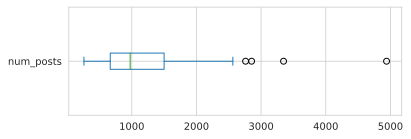

In [40]:
# horizontal boxplot of a dataframe column
cat_df[['num_posts']].plot(kind='box', vert=False, figsize=(6, 2));

> The frequencies of the individual values can be best represented by a bar chart.

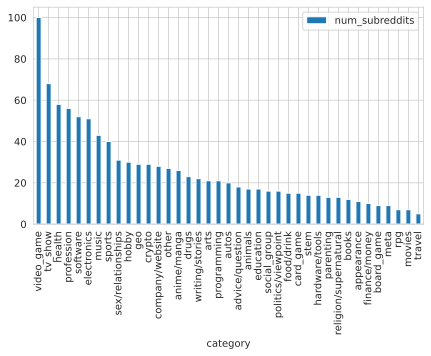

In [41]:
# bar chart of a dataframe column
cat_df[['num_subreddits']].plot(kind='bar', figsize=(7,4));

### Exploring Word Frequencies

> Now that we have an overview of the general structure of the database we can dig a little deeper into a single subreddit. We’ll look at “The Simpsons” and create a designated data frame sub_df for the next analyses. We’ll work on the nouns only, but of course, analyses can be based on all or any selection of word classes (part of speech).

In [42]:
# create a data frame slice
sub_df = df[df['subreddit']=='TheSimpsons']

# sample cleaned text and tokens tagged as nouns
sub_df[['selftext_clean', 'selftext_nouns']].sample(2)

# We notice that not all words in noun column are actually nouns :)

,selftext_clean,selftext_nouns
33595,"I'm watching Hurricane Neddy and just caught a really subtle joke that I never noticed before. Ned is watching the film of what he's like as a kid attacking other kids. \n\nNed: I'm Dick Tracy, take that Prune Face, now I'm Prune Face, take that Dick Tracy, now I'm Prune Tracy, take that Dick F... *pulled away by Doctor.*\n\nThe joke being he was going to say Dick Face. \n\nBonus: [Sneeds Seed & Feed, Formley Chucks]",Hurricane Neddy joke Ned film kid kid Ned Dick Tracy Prune Face Prune Face Dick Tracy Prune Tracy Dick F Doctor joke Dick Face Bonus Sneeds Seed Feed Formley Chucks
4117,"This is the shittiest episode of the Simpsons I have ever seen, and I have seen every episode. Yes, it is worse than Lisa Goes Gaga. It's so braindead, lazy, annoying, STUPID that it makes me want to give it a paddling.\n\nThe episode starts with a stupid scene where Homer hits Gill with a car instead of a dog. Charming. What a tasteful way to start a happy show. Literally in the first 4 minutes of the episode, they're in court. 5 minutes in, they're finished with the court thing and everyone loves Homer and the dog because he didn't murder him, so Springfield starts worshipping dogs.\n\nThis isn't even funny as a treehouse of horror short. The dogs go out of control and take over the city, so the town decides to respect Gill more as he tries to tame the dogs. Until that is abandoned because Marge kills a Chihuahua. I'm not kidding. Their Deus Ex Machina is that Marge kicks a Chihuahua to death. It's so stupid, lazy, stupid, moronic and leaves you angry.](/spoiler)\n\nThere were no good jokes in this episode. There was one stupid reference to Turbo. Why? WHY? YOU'RE REALLY GOING TO ASK WHY IN THIS FUCKING EPISODE? Everyone loves TURBO in 2017. That joke really aged well in the 9 months of production time. Hell, Turbo wasn't even relevant 9 months ago. TURBO WAS NEVER RELEVANT.\n\nDo not watch this episode. It is so, SO bad. It's so rushed and stupid. It was clearly supposed to be in Treehouse of Horror, but it was apparently too good. It's also got the same breakneck pace of a Treehouse of Horror short, which doesn't work well when it tries to be heart felt. I hate this episode so much. So, SO GOD DAMN much.",episode Simpsons episode Lisa Gaga braindead STUPID paddling episode scene Homer Gill car dog way show minute episode court minute court thing Homer dog Springfield dog treehouse horror dog control city town Gill dog Marge Chihuahua Deus Ex Machina Marge Chihuahua death moronic angry.](/spoiler joke episode reference Turbo WHY REALLY ASK fucking episode turbo joke month production time hell Turbo month turbo episode Treehouse Horror breakneck pace Treehouse Horror heart episode GOD


### Creating a List of Tokens from a List of Documents

In [43]:
def my_tokenizer(text):
    return text.split() if text != None else []

In [44]:
# transform list of documents into a single list of tokens
tokens = sub_df.selftext_nouns.map(my_tokenizer).sum()

In [45]:
print(tokens[:200])

['episode', 'time', 'other', 'instance', 'proposal', 'Putlocker', 'week', 'tv', 'Bart', 'Thanksgiving', 'episode', 'other', 'show', 'girlfriend', 'kid', 'point', 'go', 'show', 'movie', 'thing', 'reference', 'continuity', 'quality', 'reference', 'back', 'movie', 'season', 'Mr.', 'Burns', 'joke', 'consequence', 'callback', 'order', 'problem', 'quality', 'matching', 'movie', 'lot', 'episode', 'show', 'point', 'season', 'dip', 'movie', 'end', 'cap', 'movie', 'cartooniness', 'vibe', 'show', 'hour', 'episode', 'head', 'while', 'guy', 'hope', 'year', 'Lisa', 'boy', 'school', 'parent', 'stuff', 'episode', 'treehouse', 'horror', 'idea', 'idea', 'episode', 'Elijah', 'Wood', 'guest', 'show', '¯\\', 'ツ', 'post', 'time', 'episode', 'episode', 'Homer', 'City', 'New', 'York', 'season', 'episode', 'Youtube', 'min', 'clip', 'Homer', 'car', 'garage', 'Marge', 'homer', 'chore', 'paper', 'car', 'episode', 'name', 'episode', 'Homer', 'bully', 'Kearney', 'joke', 'Homer', 'line', 'guy', 'thank', 'episode', '

### Counting Frequencies with a counter

In [46]:
from collections import Counter

counter = Counter(tokens)
counter.most_common(20)

[('episode', 79),
 ('season', 36),
 ('Homer', 26),
 ('Simpsons', 25),
 ('*', 16),
 ('time', 13),
 ('show', 13),
 ('year', 13),
 ('thing', 12),
 ('joke', 12),
 ('Bart', 10),
 ('Marge', 10),
 ('scene', 10),
 ('movie', 9),
 ('Lisa', 9),
 ('vote', 9),
 ('character', 9),
 ('homer', 8),
 ('simpson', 8),
 ('thank', 6)]

In [47]:
df.category.unique()

array(['writing/stories', 'tv_show', 'autos', 'hardware/tools',
       'electronics', 'video_game', 'crypto', 'sports', 'hobby',
       'appearance', 'card_game', 'drugs', 'advice/question',
       'social_group', 'anime/manga', 'sex/relationships', 'software',
       'health', 'other', 'animals', 'arts', 'programming', 'rpg',
       'books', 'parenting', 'education', 'company/website', 'profession',
       'music', 'politics/viewpoint', 'stem', 'travel', 'geo',
       'religion/supernatural', 'board_game', 'movies', 'food/drink',
       'finance/money', 'meta'], dtype=object)

In [48]:
print([t[0] for t in counter.most_common(200)])   

['episode', 'season', 'Homer', 'Simpsons', '*', 'time', 'show', 'year', 'thing', 'joke', 'Bart', 'Marge', 'scene', 'movie', 'Lisa', 'vote', 'character', 'homer', 'simpson', 'thank', 'dog', 'one', 'day', 'reference', 'idea', 'car', 'way', 'series', 'Krusty', 'dvd', 'voice', 'DVD', 'kid', 'point', 'guy', 'clip', 'opinion', 'help', 'people', 'family', 'Dick', 'vision', 'tv', 'Burns', 'problem', 'head', 'post', 'name', 'Treehouse', 'Horror', 'Vote', 'Mayor', 'gag', 'Flanders', 'Broncos', 'future', 'mr', 'reason', 'store', 'woman', 'signature', 'job', 'today', 'money', 'office', 'moe', 'service', 'plot', 'Season', 'decade', 'bit', 'place', 'Tracy', 'Prune', 'Face', 'party', 'Quimby', 'actor', 'Hank', 'other', 'instance', 'week', 'continuity', 'quality', 'Mr.', 'lot', 'end', 'hour', 'while', 'hope', 'school', 'treehouse', 'horror', 'guest', 'New', 'line', 'Gill', 'minute', 'court', 'Chihuahua', 'Turbo', 'turbo', 'month', 'hell', 'Poll', ':*', 'Halloween', 'sea', 'captain', 'man', 'title', 'a

>***Now the quality issue with the nouns becomes a problem because some obviously not very informative words made it into our list of most frequent nouns. If we’d need a better quality of the nouns, we should solve the issue by improving our POS tagger. But here we will simply use a quick fix and remove all stop words from the list of tokens.***

In [49]:
from spacy.lang.en.stop_words import STOP_WORDS

def remove_stopwords(tokens):
    """Remove stopwords from a list of tokens."""
    return [t for t in tokens if t not in STOP_WORDS]

# rebuild counter
counter = Counter(remove_stopwords(tokens))

> For simplified plotting of the most common tokens, we convert the list of tuples into a data frame.

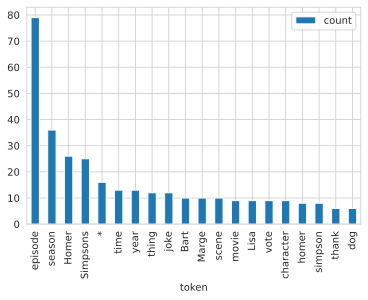

In [50]:
# convert list of tuples into data frame
freq_df = pd.DataFrame.from_records(counter.most_common(20),
                                    columns=['token', 'count'])

# create bar plot
freq_df.plot(kind='bar', x='token');

### Using Word Clouds
> Word frequencies can be visualized very clearly by word clouds. The wordcloud package makes word cloud generation very simple. Since some options and settings are required, it makes sense to wrap the necessary calls into a small function.

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt

In [52]:
from wordcloud import WordCloud

def wordcloud(counter):
    """A small wordloud wrapper"""
    wc = WordCloud(width=1200, height=800, 
                   background_color="white", 
                   max_words=200) 
    wc.generate_from_frequencies(counter)

    # Plot
    fig=plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

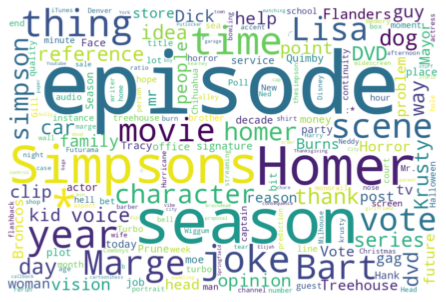

In [53]:
# create wordcloud
wordcloud(counter)

> Let’s compare the previous word cloud of “The Simpsons” with the word cloud for “The Sopranos”:

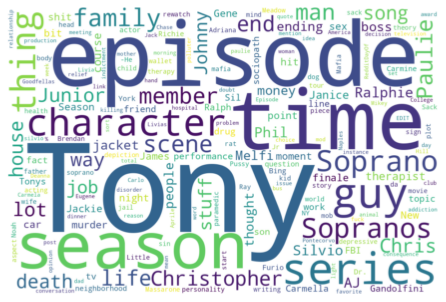

In [54]:
tokens2 = df[df['subreddit']=='thesopranos'].selftext_nouns \
         .map(my_tokenizer).sum()

counter2 = Counter(remove_stopwords(tokens2))
wordcloud(counter2)

### Exploring Text Complexity
> The final example for text data exploration involves text complexity. We want to answer the question whether the complexity of the posts varies over the categories. There are several possible metrics to measure complexity, e.g. the length of the text in characters or words. Also, readability indices like Flesch-Kincaid can be used as a complexity metric. The Python library textacy provides a nice TextStats function to calculate various of these statistics.

>Here, we stick to the number of tokens which is already included in our preprocessed dataset from the first post. A plot of the mean number of tokens reveals that not surprisingly the posts about writing are by far the longest, while in contrast posts about music are rather short.

In [55]:
df['no_tokens'] = df.selftext_lemma\
  .map(lambda l: 0 if l==None else len(l.split()))

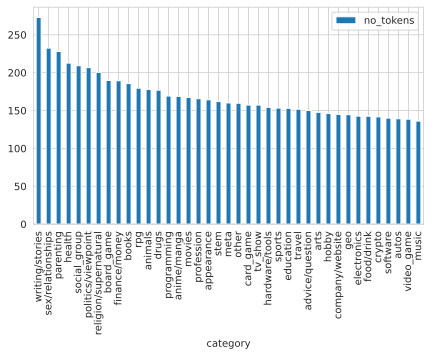

In [56]:
# mean number of tokens by category
df.groupby(['category']) \
  .agg({'no_tokens':'mean'}) \
  .sort_values(by='no_tokens', ascending=False) \
  .plot(kind='bar', figsize=(7,4));

> But the chart above just shows the mean number of tokens. It would be nice to compare the distributions of this value per category. Python boxplots allow us to do this. The code below uses seaborn which is visually more charming than pure matplotlib.

In [57]:
# render plots as retina or png, because svg is very slow
%config InlineBackend.figure_format = 'retina'

import seaborn as sns

def multi_boxplot(data, x, y, ylim = None):
    '''Wrapper for sns boxplot with cut-off functionality'''
    # plt.figure(figsize=(30, 5))
    fig, ax = plt.subplots()
    plt.xticks(rotation=90) 

    # order boxplots by median
    ordered_values = data.groupby(x)[[y]] \
                         .median() \
                         .sort_values(y, ascending=False) \
                         .index
        
    sns.boxplot(x=x, y=y, data=data, palette='Set2', 
                order=ordered_values)

    fig.set_size_inches(11, 6)
    
    # cut-off y-axis at value ylim
    ax.set_ylim(0, ylim)

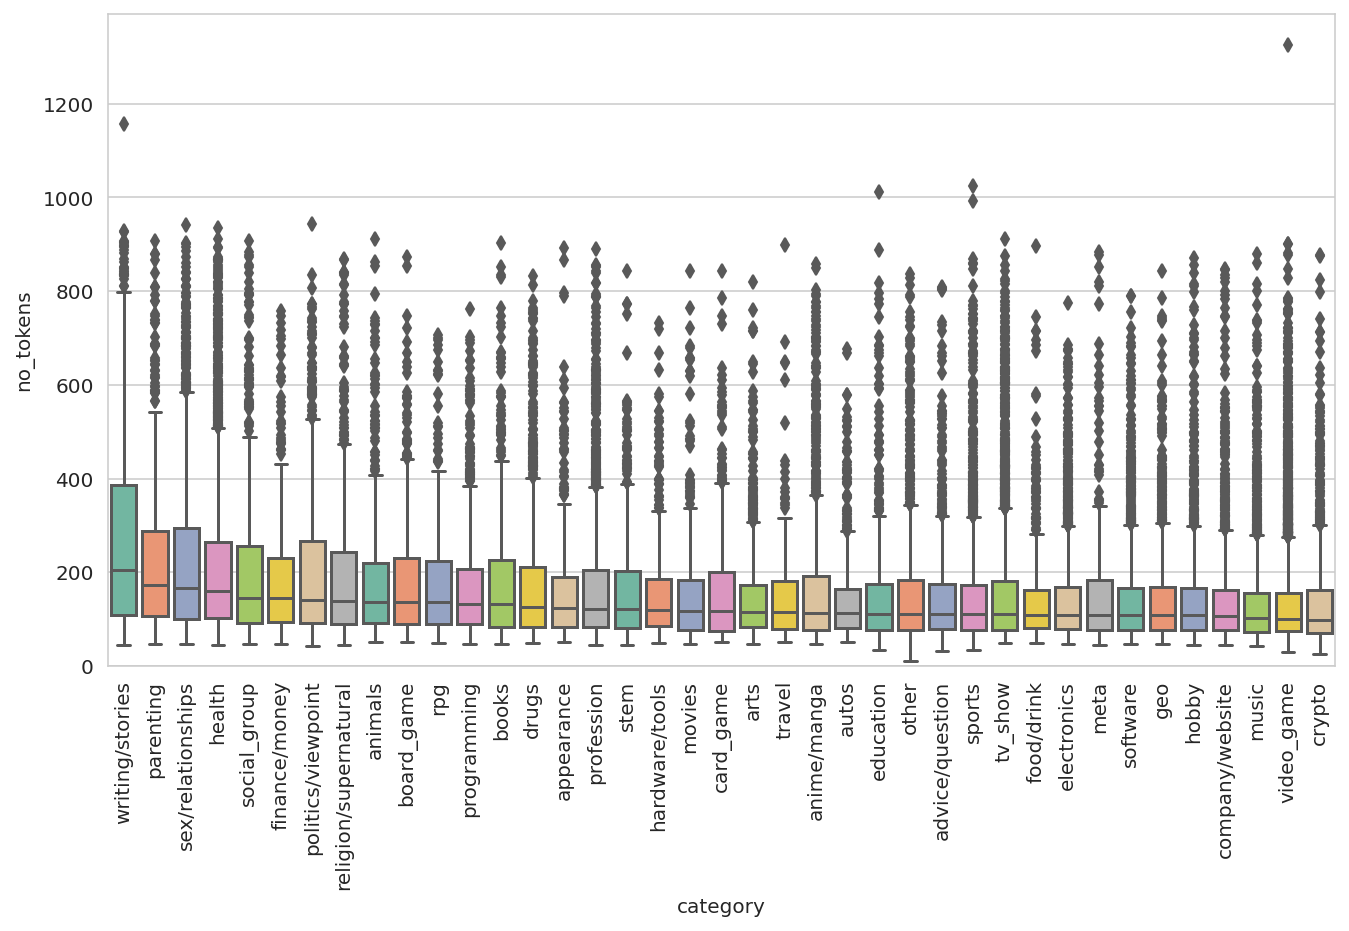

In [58]:
multi_boxplot(df, 'category', 'no_tokens');

###Outliers often indicate Quality Problems


In [60]:
# print text of outliers
df['selftext_lemma'][df.no_tokens > 500]

47       so I just write out an incredibly long post with hope of post multiple screenshot ,   but I somehow mess up ( I will take help on that too ! ) \n\n I ve post here a few time before and later delete say post so I be really familiar with the NC letter and the cease and desist letter attorney send out . \n\n my 7 year old son get a 4 page letter in the mail today from my late husband 's mother .   our relationship have be a series of NC , lc rinse and repeat . after the last 6 month span where MIL ( who live 3 mile from we ) do not so much as text and ask about my son I tell she she be wrong to expect he for Christmas .   I go on to block she on my phone but she be be block from social Media for year .  \n\n in may she make a pity I Facebook post about not be invite to his 7th birthday party which I neither plan nor put out invite for because it be host by a group .   this party end up with a lot of medium coverage and with my son be interview a few time .  \n\n so she post , hav

> We ignore the outliers for the moment and limit the y-axis to the value of 500 tokens to better explore the distribution in the lower quartiles:

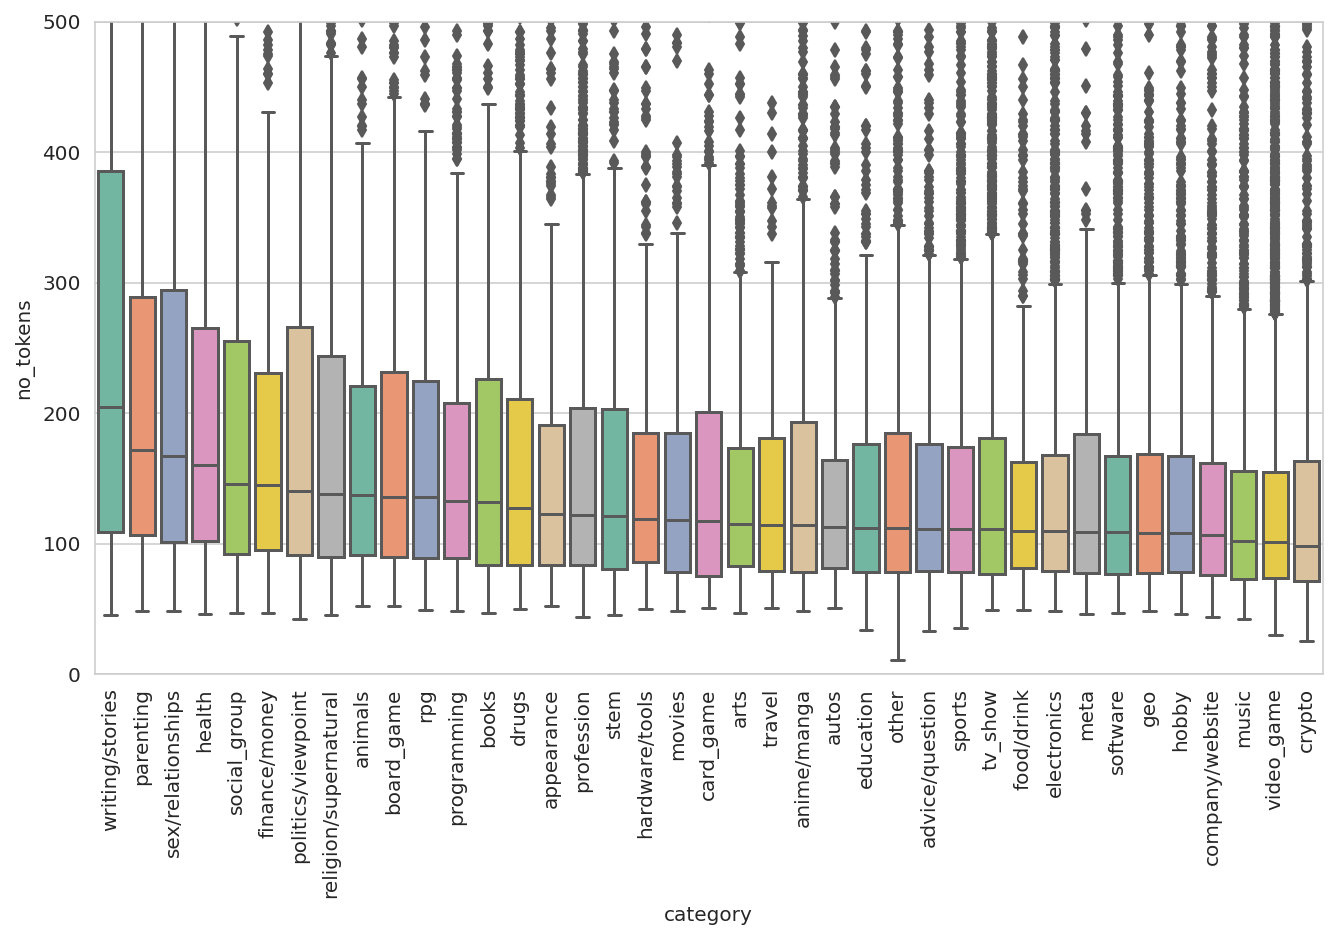

In [61]:
# cut-off diagram at y=500
multi_boxplot(df, 'category', 'no_tokens', ylim=500)

> **Now we compare a single category ro it's subreddits**

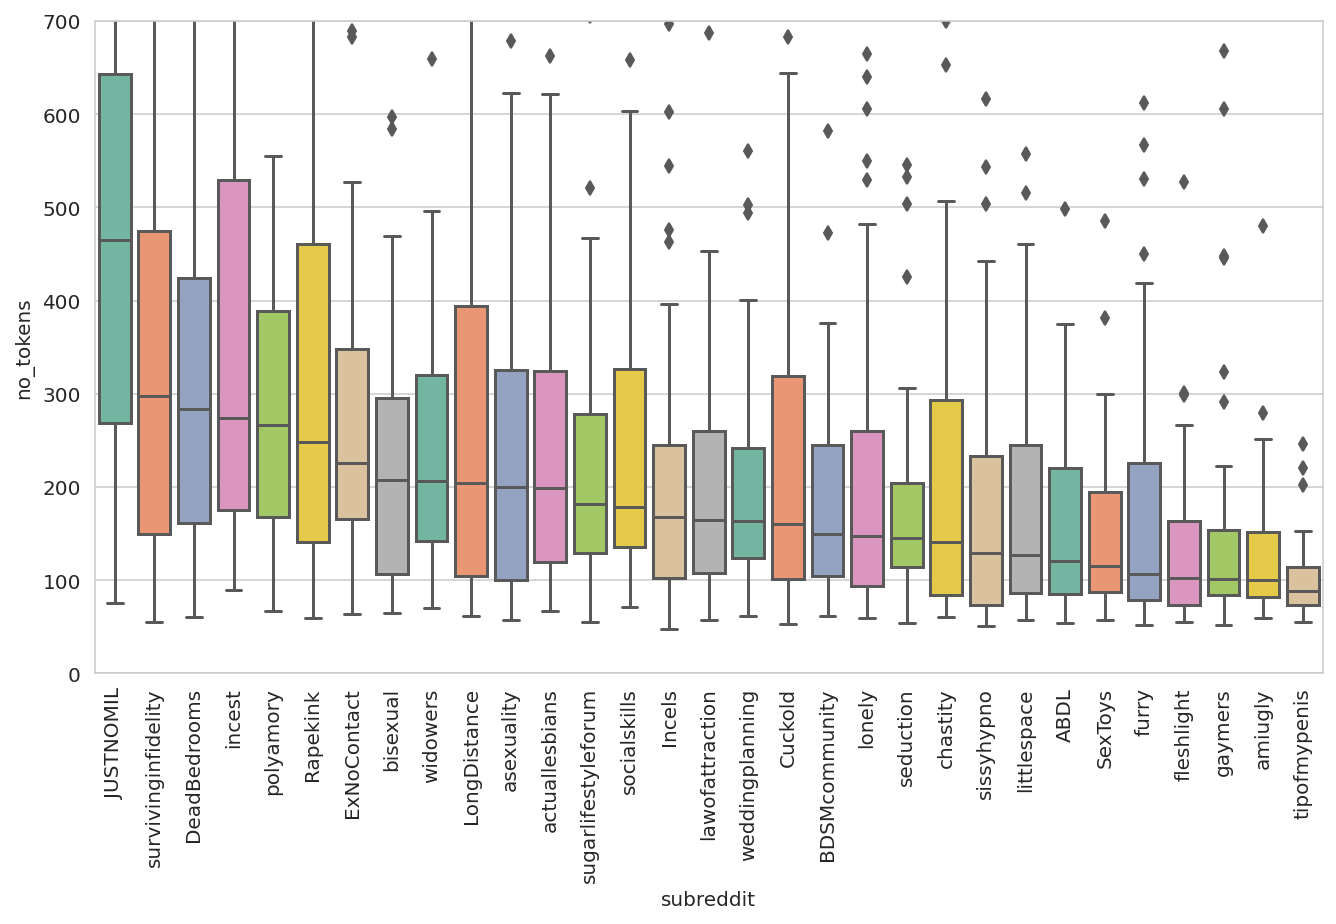

In [62]:
# comparing subreddits within a single category
multi_boxplot(df[df.category=='sex/relationships'], 
              'subreddit', 'no_tokens', ylim=700)